# **Importing Libraries:**

---


In [ ]:
# Libraries for Data Manipulation
import numpy as np
import pandas as pd


# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')


# Libraries to Handle Machine Learning Models
import joblib
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


# Model Evaluation Metrics
from sklearn.metrics import (
    f1_score,
    recall_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    classification_report,
)

# **Loading data**

---


In [2]:
x_train_scaled = pd.read_csv('./DATASET/EDA-DATASET/x_train_scaled.csv')
x_test_scaled = pd.read_csv('./DATASET/EDA-DATASET/x_test_scaled.csv')
y_train = pd.read_csv('./DATASET/EDA-DATASET/y_train.csv')
y_test = pd.read_csv('./DATASET/EDA-DATASET/y_test.csv')

# **Function to evaluate model**

---


In [3]:
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = accuracy_score(
        y_test,
        y_pred
    )

    precision = precision_score(
        y_test,
        y_pred,
        average='weighted'
    )

    recall = recall_score(
        y_test,
        y_pred,
        average='weighted'
    )

    f1 = f1_score(
        y_test,
        y_pred,
        average='weighted'
    )

    conf_matrix = confusion_matrix(
        y_test,
        y_pred
    )

    class_report = classification_report(
        y_test,
        y_pred
    )

    roc_auc = roc_auc_score(
        y_test,
        y_prob,
        multi_class='ovr',
        average='weighted'
    )

    return accuracy, precision, recall, f1, conf_matrix, class_report, roc_auc

# **Hyper-Parameter Tuning Setups**

---


# **Defining the Parameter grid for AdaBoost**

---


In [ ]:
param_grid_ab = {
    'n_estimators': [50, 100, 200],         # Number of weak classifiers 
    'learning_rate': [0.01, 0.1, 1],        # Weight applied to each weak classifier
}

# **Performing the GridSearchCV for AdaBoost**

---


In [5]:
grid_search_ab = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid_ab,
    cv=2,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)



grid_search_ab.fit(x_train_scaled, y_train.values.ravel())


best_ab_model = grid_search_ab.best_estimator_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


# **Running Predictions and Evaluation**

---


- **Predicting the class labels and probabilities using AdaBoost model**


In [12]:
# Predictions and probabilities
y_pred_ab = best_ab_model.predict(x_test_scaled)
y_prob_ab = best_ab_model.predict_proba(x_test_scaled)


accuracy_ab, precision_ab, recall_ab, f1_ab, conf_matrix_ab, class_report_ab, roc_auc_ab = evaluate_model(
    y_test, y_pred_ab, y_prob_ab
)

# **Confusion Matrix**

---


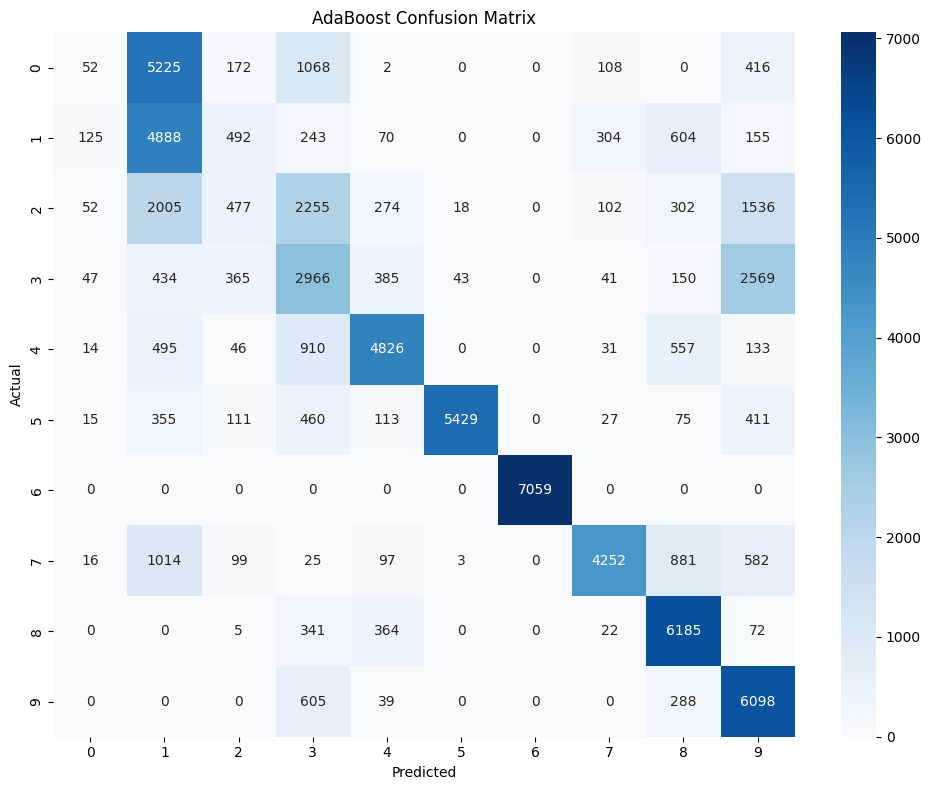

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))


sns.heatmap(
    conf_matrix_ab,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=ax
)


ax.set_title('AdaBoost Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


plt.tight_layout()


plt.show()

# **ROC-AUC Curves**

---


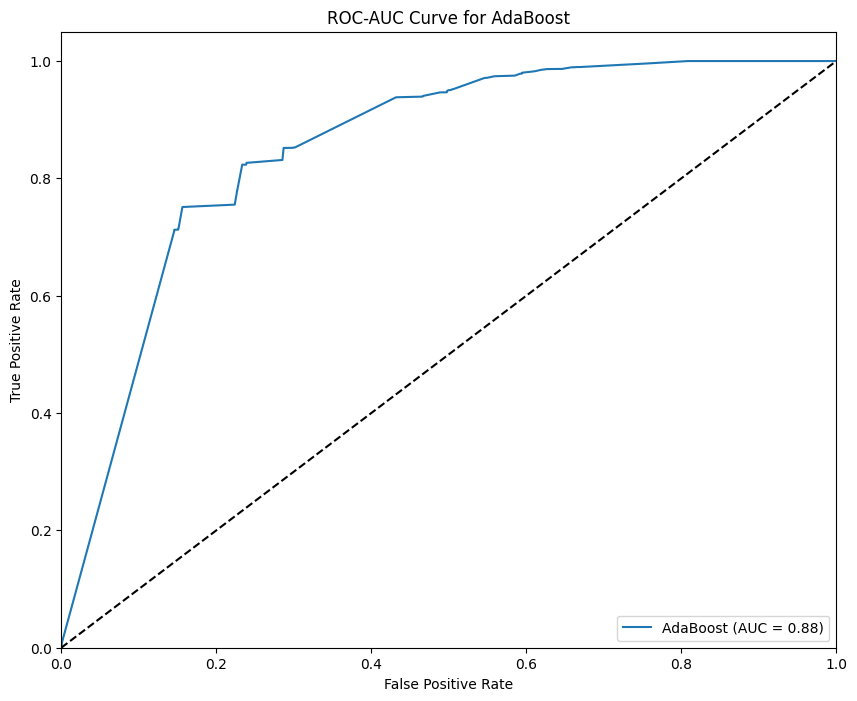

In [14]:
plt.figure(figsize=(10, 8))


fpr_ab, tpr_ab, _ = roc_curve(
    y_test,
    y_prob_ab[:, 1],
    pos_label=1
)


plt.plot(
    fpr_ab,
    tpr_ab,
    label='AdaBoost (AUC = {:.2f})'.format(roc_auc_ab)
)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for AdaBoost')


plt.legend(loc='lower right')


plt.show()

# **Model Summary Table**

---


In [15]:
summary_ab = pd.DataFrame({
    'Model': ['AdaBoost'],
    'Accuracy': [accuracy_ab],
    'Precision': [precision_ab],
    'Recall': [recall_ab],
    'F1 Score': [f1_ab],
    'ROC-AUC': [roc_auc_ab]
})

In [16]:
print("AdaBoost Model Summary:\n")

print(summary_ab)

AdaBoost Model Summary:

      Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  AdaBoost  0.603314   0.594175  0.603314  0.568793  0.877483


# **Saving the best model:**

---


In [11]:
# joblib.dump(best_ab_model, '07_AdaBoost.pkl')

# **Key Inferences for AdaBoost:**

---


## **AdaBoost Model Summary**

### **Performance Comparison Across Different Configurations**

| **CV** | **Scoring** | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **ROC-AUC** | **Comments** |
| ------ | ----------- | ------------ | ------------- | ---------- | ------------ | ----------- | ------------ |
| 2      | `accuracy`  | 0.603314             | 0.594175           x   | 0.603314           | 0.568793             | 0.877483            |              |
|        |             |              |               |            |              |             |              |
|        |             |              |               |            |              |             |              |
|        |             |              |               |            |              |             |              |
|        |             |              |               |            |              |             |              |

---

### **Outcome**

- **Preferred Configuration:**
